In [1]:
%matplotlib inline
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [2]:
audio_data = 'example.mp3'
y, sr = librosa.load(audio_data)

<ipython-input-2-71fc82e9151d>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_data)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


## Анализ сигнала:

- отрисовать сигнал в амплитудно-временной форме

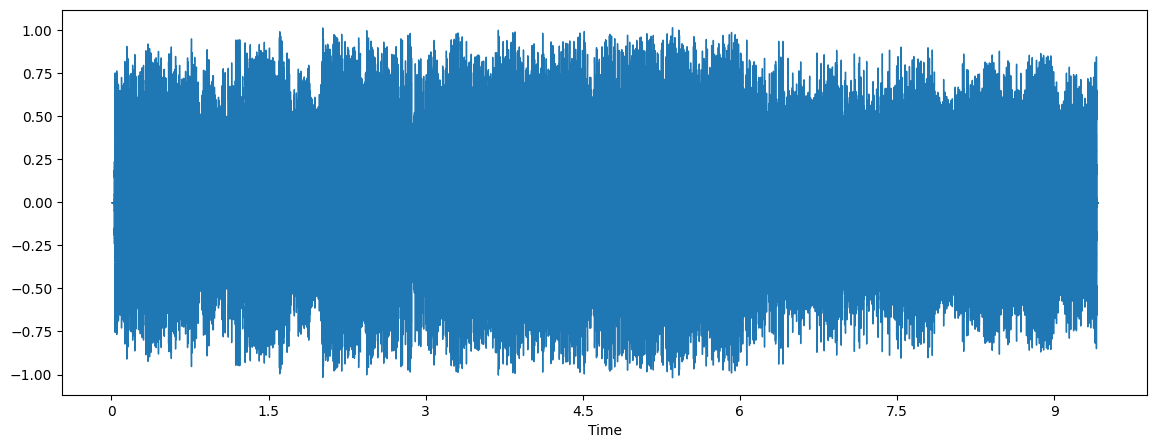

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

- используя преобразование Фурье отрисовать частотный спектр

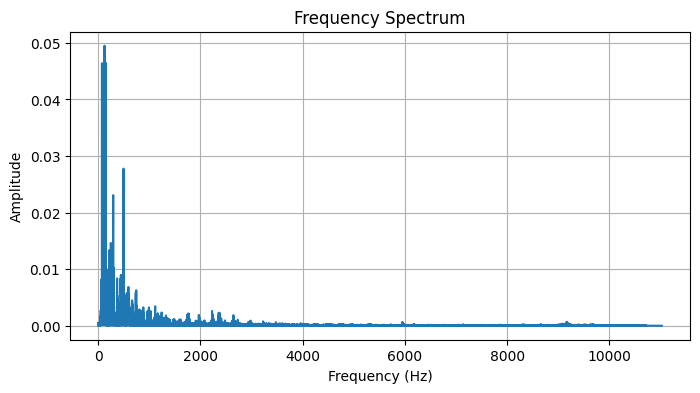

In [4]:
from scipy.fftpack import fft
# применение fft к сигналу
spectrum = fft(y)

N = len(spectrum) # Количество точек в FFT
frequencies = np.fft.fftfreq(N, 1 / sr) # Частоты соответствующих бинов

plt.figure(figsize=(8, 4))
plt.plot(frequencies[:N//2], np.abs(spectrum[:N//2]) / N)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

- отрисовать спектрограмму сигнала

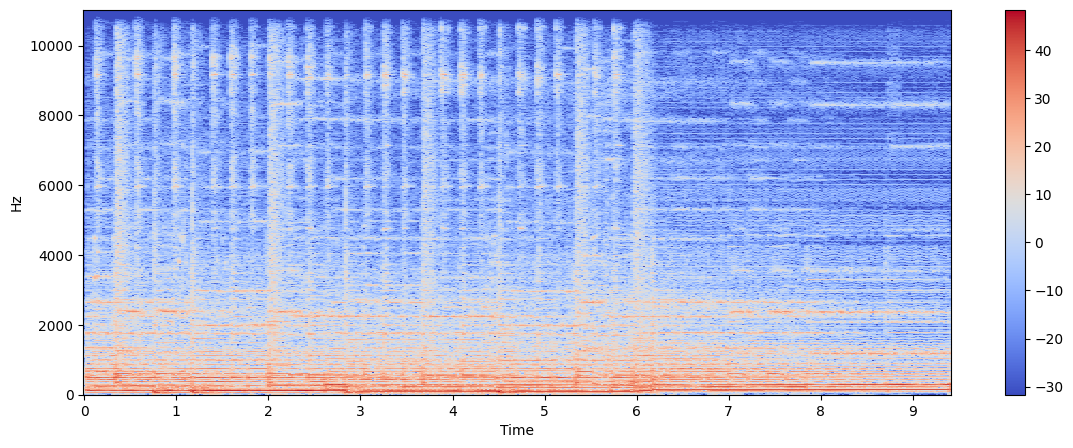

In [5]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

## Выделение признаков:


In [6]:
y_harmonic, y_percussive = librosa.effects.hpss(y) # гармоническо-перкуссивная сепарация

- вывести значение темпа и количество бит (написать в чем состояла ошибка
при выведении битов в приложенном файле)


Решение ошибки: <br>
`seaborn.barplot()` ожидает данные в формате `DataFrame`, а не в виде отдельных массивов. <br>
Для решения проблемы импортируем `pandas`, а затем преобразуем наши данные в `DataFrame`. <br>
*Чтоб не загрязнять решение исправлением ошибки, импорт pandas оставил в секции **Подготовка**.* <br>

Detected Tempo: [143.5546875] beats/min
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


<ipython-input-7-bfe84dfff62f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Beats', y='Time difference (s)', data=data, palette="BuGn_d", ax=ax)


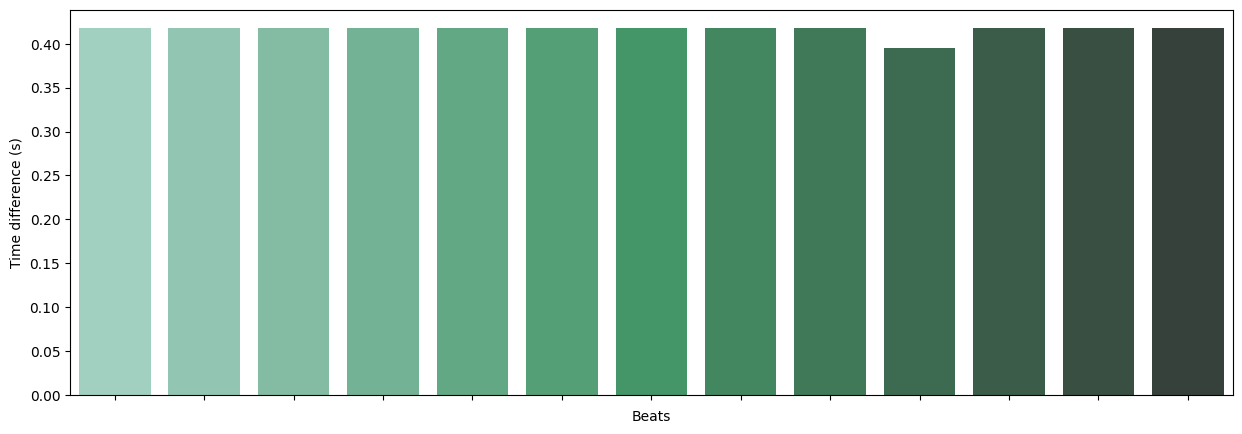

In [7]:
# Beat Extraction
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

print(beat_nums)

data = pd.DataFrame({'Beats': beat_nums, 'Time difference (s)': beat_time_diff})

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
g = sns.barplot(x='Beats', y='Time difference (s)', data=data, palette="BuGn_d", ax=ax)
g=g.set(xticklabels=[])

- получить и вывести в виде изображения и numpy массива мелкепстральные коэффициенты

Text(0.5, 1.0, 'MFCC')

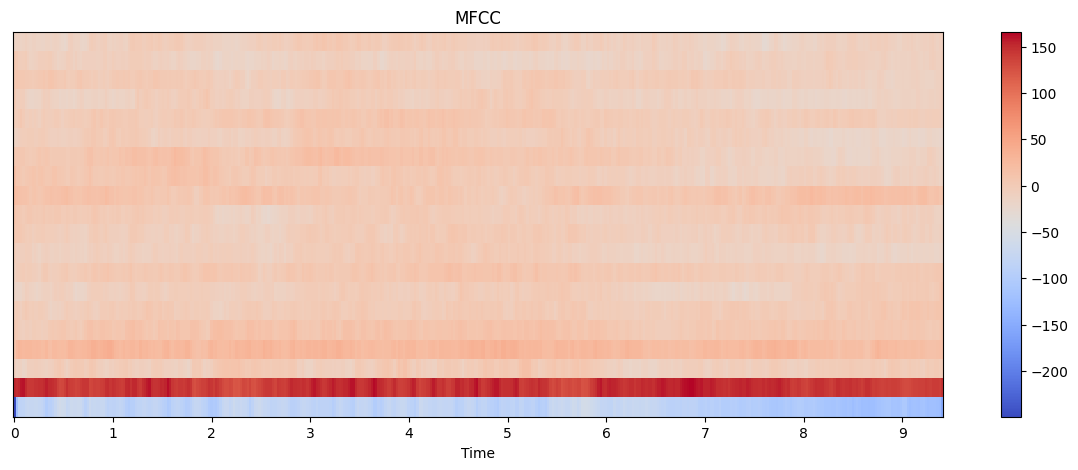

In [8]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

- получить и вывести изображение спектрального центроида на одном
изображении с сигналом в амплитудно-временной форме

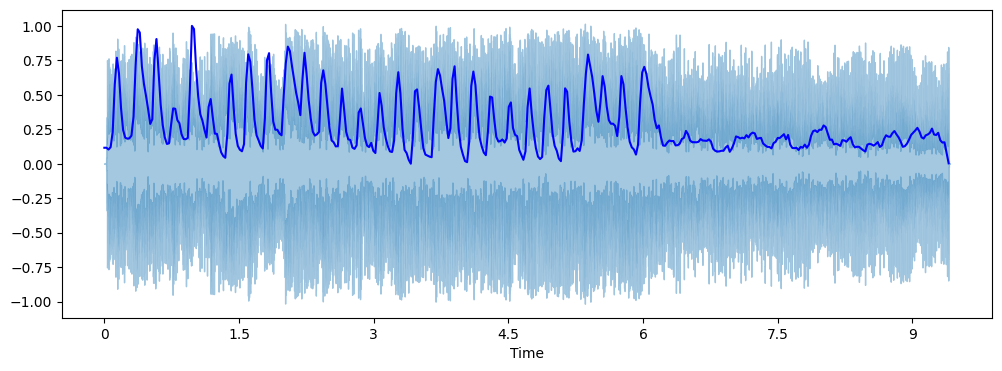

In [9]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_centroids = cent[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

# **Ответ на вопрос**

Гармонические звуки обладают стабильными частотными характеристиками, такими как звуки фортепиано, гитары, скрипки или голоса. Они представляют собой периодические колебания, включающие основную частоту и её обертоны (гармоники).

Перкуссионные звуки, напротив, характеризуются короткими, резкими изменениями во времени, как в случае с барабанами, хлопками или щелчками. Они служат для создания ритмических акцентов и ударных эффектов.

Разделение гармонических и перкуссионных элементов используется для решения следующих задач:

Музыкальный анализ и аранжировка
Это позволяет выделить ритмическую основу композиции для последующего наложения новых гармонических элементов.

Создание минусовок и ремиксов
Можно извлечь ритмическую часть трека для создания ремикса или сосредоточиться на мелодической составляющей, например, удаляя вокал.

Обработка звука и улучшение качества аудиозаписей
При реставрации старых записей гармонические и перкуссионные элементы обрабатываются отдельно для уменьшения шума и повышения качества звучания.

Ритмическая и тональная сегментация
Это помогает анализировать ритмические и гармонические структуры, такие как ритм или аккорды, для задач музыкального распознавания.

Музыкальные приложения и обучающие системы
В приложениях для обучения игре на инструментах анализ гармонической составляющей помогает пользователю совершенствовать исполнение мелодий.